## **NBA PLAYERS BY RACE (BY COUNTRY OF ORIGIN CLASSIFICATION)** <a id="1"></a>

<a><img style="float: right;" src="https://pbs.twimg.com/media/D_SZjUSWkAENmvg.jpg" width="300" /></a>
 



- Data Source: /kaggle/input/country-code/country_code.csv
             : /kaggle/input/nba-players-data/all_seasons.csv

### 1.2 Notebook Preparation <a id="1.2"></a>

This part of the notebook deals with the relevant library import and visual configuration.

In [3]:
# Import libraries

import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
# Set notebook options


pd.options.display.max_columns = 30

import warnings
warnings.filterwarnings("ignore")

## **2. Data Preparation** <a id="2"></a>

The below section provides an initial exploration of the data.

In [5]:
# Import the data as a DataFrame and check first 5 rows

df = pd.read_csv('all_seasons.csv', index_col=0)

df.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


- Let us count the number of records we have in our dataset. Our dataset has 12305 rows and 21 columns in the dataset.

In [6]:
df.shape

(12305, 21)

In [7]:
# Check data types and if any records are missing

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

- There are 12305 input records of country.

In [8]:
# No missing record in the dataset.
# Let us view the statistical information of our the NBA players dataset

df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


## **2. Country Exploration** <a id="3"></a>

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
# Let us count the number of countries and print their frequency of occurrence.

df['country'].value_counts()

USA           10308
Canada          182
France          181
Australia        89
Spain            88
              ...  
Sudan (UK)        1
Ghana             1
Denmark           1
Colombia          1
Portugal          1
Name: country, Length: 82, dtype: int64

- Visualizing NBA players per Country Category

In [11]:
# Group activityName, calculate mean of averageHeartRate

df.groupby(['country']).count()

,player_name,team_abbreviation,age,player_height,player_weight,college,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
country,,,,,,,,,,,,,,,,,,,,
Angola,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Argentina,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
Australia,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
Austria,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bahamas,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
United Kingdom,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Uruguay,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


- There are 82 unique countries in our dataset. For the purpose of simplicity and clarity, Let us group these countries into 15 groups

- Group 1 = United States of America.
- Group 2 = United Kingdom.
- Group 3 = Italy. 
- Group 4 = Germany.
- Group 5 = France.
- Group 6 = Canada.
- Group 7 = China.
- Group 8 = Japan.
- Group 9 = Brazil.
- Group 10 = Russia.
- Group 11 = Australia
- Group 12 = Spain
- Group 13 = Argentina
- Group 14 = Ukraine
- Group 15 = Rest of the World

In [6]:
 # Counting specific country value 

usa = (df['country']=='USA').sum()
usa

10308

In [7]:
 # Counting specific country value 

uk = (df['country']=='United Kingdom').sum()
uk

22

In [8]:
 # Counting specific country value 

italy = (df['country']=='Italy').sum()
italy

41

In [9]:
 # Counting specific country value 

germany = (df['country']=='Germany').sum()
germany

59

In [10]:
 # Counting specific country value 

france = (df['country']=='France').sum()
france

181

In [11]:
 # Counting specific country value 

canada = (df['country']=='Canada').sum()
canada

182

In [12]:
 # Counting specific country value 

china = (df['country']=='China').sum()
china

18

In [13]:
 # Counting specific country value 

japan = (df['country']=='Japan').sum()
japan

8

In [14]:
 # Counting specific country value 

brazil = (df['country']=='Brazil').sum()
brazil

85

In [15]:
 # Counting specific country value 

russia = (df['country']=='Russia').sum()
russia

37

In [16]:
 # Counting specific country value 

australia = (df['country']=='Australia').sum()
australia

89

In [17]:
 # Counting specific country value 

spain = (df['country']=='Spain').sum()
spain

88

In [18]:
 # Counting specific country value 

argentina = (df['country']=='Argentina').sum()
argentina

65

In [19]:
 # Counting specific country value 

ukraine = (df['country']=='Ukraine').sum()
ukraine

43

In [27]:
 # Counting specific country value 

rest_of_the_world = len(df['country']) - usa - uk - italy - germany - france - canada - china - japan - brazil - russia - australia - spain - argentina - ukraine
rest_of_the_world

1079

In [77]:
# Create DataFrame
dataframe = pd.DataFrame()

# Add columns
dataframe['country'] = ['USA', 'United Kingdom', 'Italy', 'Germany', 'France', 'Canada', 'China', 'Japan', 'Brazil', 'Russia', 'Australia', 'Spain', 'Argentina', 'Ukraine', 'Rest of World']
dataframe['Number of NBA Players'] = [usa, uk, italy, germany, france, canada, china, japan, brazil, russia, australia, spain, argentina, ukraine, rest_of_the_world]

# Show DataFrame
dataframe

,country,Number of NBA Players
0,USA,10308
1,United Kingdom,22
2,Italy,41
3,Germany,59
4,France,181
5,Canada,182
6,China,18
7,Japan,8
8,Brazil,85
9,Russia,37


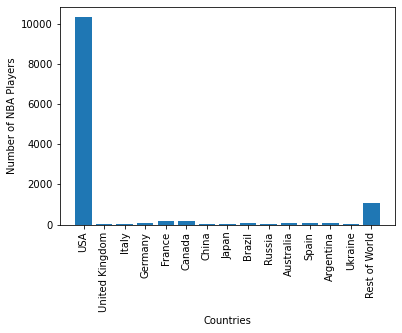

In [78]:
x = dataframe["country"]
y = dataframe["Number of NBA Players"]
plt.bar(x,y,align='center') # A bar chart
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Number of NBA Players')
plt.show()

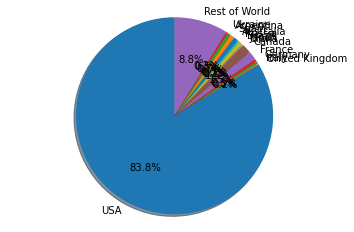

<Figure size 1440x1080 with 0 Axes>

In [86]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = x = dataframe["country"]
data = dataframe["Number of NBA Players"]


fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
fig = plt.figure(figsize =(20, 15))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

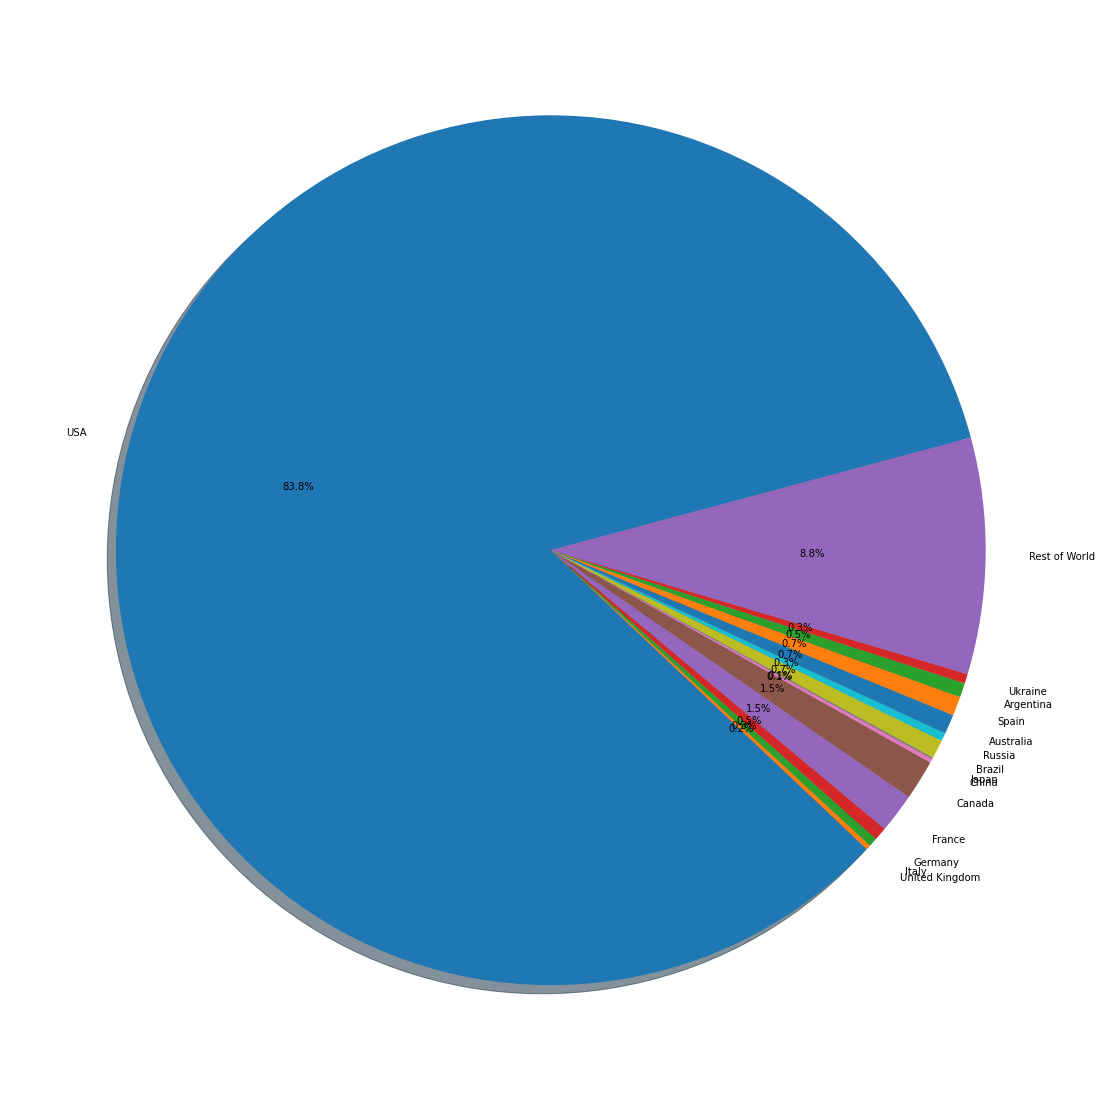

In [93]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
countries = x = dataframe["country"]
 
data = dataframe["Number of NBA Players"]
 
# Creating plot
fig = plt.figure(figsize =(60, 20))
plt.pie(data, labels = countries, autopct='%1.1f%%', startangle=15, shadow=True)
 
# show plot
plt.show()



<a><img style="" src="https://cdn.vox-cdn.com/thumbor/9U7Bn1ajYJ9ySFczKP9bno1HnIw=/0x0:1200x800/1200x800/filters:focal(348x97:540x289)/cdn.vox-cdn.com/uploads/chorus_image/image/60847977/Di9eY4zX0AApYXt.0.jpg"/></a>


## **5. Conclusion** <a id="5"></a>


### With a total of 12305 MBA players in our dataset, the following table shows the number of MBA players based on their various countries of origin.

- MBA players from United States of America represent 83.8% of the dataset
- MBA players from United Kingdom represent 0.2% of the dataset
- MBA players from Italy represent 0.3% of the dataset
- MBA players from Germany represent 0.5% of the dataset
- MBA players from France represent 1.5% of the dataset
- MBA players from Canada represent 1.5% of the dataset
- MBA players from China represent 0.1% of the dataset
- MBA players from Japan represent 0.1% of the dataset
- MBA players from Brazil represent 0.7% of the dataset
- MBA players from Russia represent 0.3% of the dataset
- MBA players from Australia represent 0.7% of the dataset
- MBA players from Spain represent 0.7% of the dataset
- MBA players from Argentina represent 0.5% of the dataset
- MBA players from Ukraine represent 0.3% of the dataset
- MBA players from Rest of the World represent 8.8% of the dataset

In [94]:
dataframe

,country,Number of NBA Players
0,USA,10308
1,United Kingdom,22
2,Italy,41
3,Germany,59
4,France,181
5,Canada,182
6,China,18
7,Japan,8
8,Brazil,85
9,Russia,37
